# Practical Lab 1 : Univariate Linear Regression on the Housing Prices Dataset
# Prashansa Rathod 8993410

Problem Defination : a univariate linear regression model. You are asked to run a linear regression between the median house value (dependent variable) and each of the following independent variables. You should run three models, one for each independent variable: 

* Median income
* Population
* Number of households

# ANSWER
To run a univariate linear regression for each independent variable with median house value as the dependent variable, follow these steps:

+ Model 1: Median House Value vs. Median Income

Dependent Variable: Median House Value
Independent Variable: Median Income

+ Model 2: Median House Value vs. Population

Dependent Variable: Median House Value
Independent Variable: Population

+ Model 3: Median House Value vs. Number of Households

Dependent Variable: Median House Value
Independent Variable: Number of Households

# STEP 1 Goal of this Product

The goal of this report is to analyze the relationships between median house value and key socioeconomic factors using univariate linear regression models. Specifically, the report aims to evaluate how median house value, which is a critical indicator of real estate market trends and economic health, is influenced by three independent variables: median income, population, and the number of households.

By conducting three separate univariate regression models, one for each independent variable, this report seeks to provide insights into which factors have the strongest and most significant impact on median house values. The analysis will focus on identifying patterns and quantifying the extent to which changes in each independent variable contribute to variations in house prices. This information will be crucial for policymakers, real estate investors, and urban planners to understand housing market dynamics and make informed decisions.

Key objectives of the report include:

* Understanding the influence of median income on house values and whether higher income levels correlate with higher house prices.
* Investigating the relationship between population size and median house value, particularly if larger populations are associated with higher housing demand and prices.
* Examining the effect of the number of households on median house value to determine how housing supply dynamics interact with prices.

The ultimate goal is to produce a data-driven understanding of how these socioeconomic variables shape housing markets, aiding stakeholders in decision-making processes.

# STEP 2 Hyperlink to the source
 Source: Downloaded from :::https://www.kaggle.com/code/mariamezzathammam/housing-price-dataset
https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

# STEP 3 Exploratory Data Analysis

An approach to analyzing data sets to summarize their main characteristics, often with visual methods.

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [50]:

# Load the CSV file into a pandas DataFrame
housing = pd.read_csv('housing.csv')

# Display the first few rows of the dataset to check the content
#print(data)
display(housing)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [51]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [52]:
len(housing)
housing.shape

(20640, 10)

In [53]:
import pandas as pd

# Loading the data
url = "DATA_SOURCE_LINK"
housing = pd.read_csv("housing.csv")


In [54]:
# Getting summary statistics
print(housing[['median_house_value', 'median_income', 'population', 'households']].describe())


       median_house_value  median_income    population    households
count        20640.000000   20640.000000  20640.000000  20640.000000
mean        206855.816909       3.870671   1425.476744    499.539680
std         115395.615874       1.899822   1132.462122    382.329753
min          14999.000000       0.499900      3.000000      1.000000
25%         119600.000000       2.563400    787.000000    280.000000
50%         179700.000000       3.534800   1166.000000    409.000000
75%         264725.000000       4.743250   1725.000000    605.000000
max         500001.000000      15.000100  35682.000000   6082.000000


<Axes: xlabel='median_income', ylabel='median_house_value'>

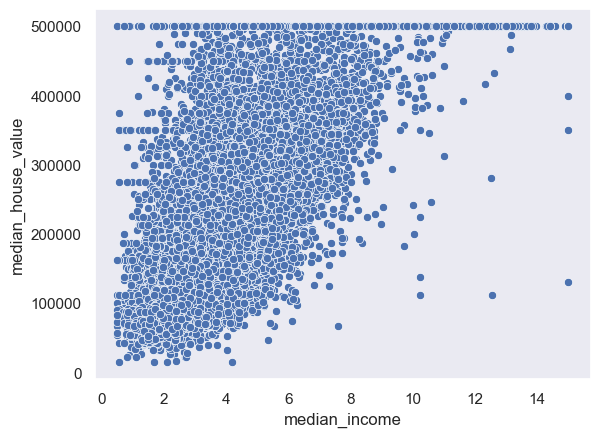

In [55]:
sns.scatterplot(x="median_income", y="median_house_value", data=housing)


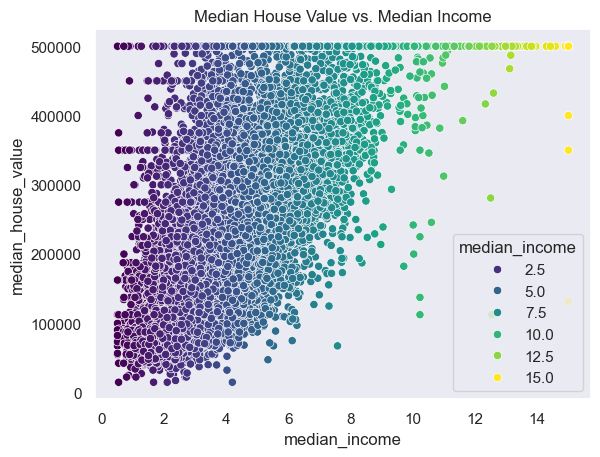

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot for median house value vs. median income

# Custom palette
palette = sns.color_palette("viridis", as_cmap=True)

# Scatter plot with custom palette
sns.scatterplot(x='median_income', y='median_house_value', data=housing, hue='median_income', palette=palette)
plt.title('Median House Value vs. Median Income')
plt.show()


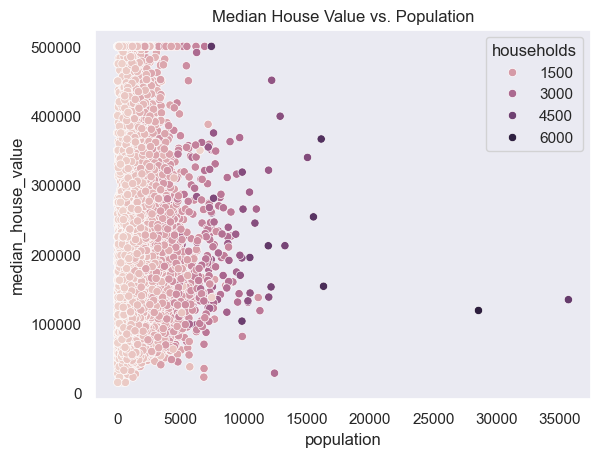

In [57]:
# Plot for median house value vs. population
sns.scatterplot(x='population', y='median_house_value', hue='households', data=housing)
plt.title('Median House Value vs. Population')
plt.show()

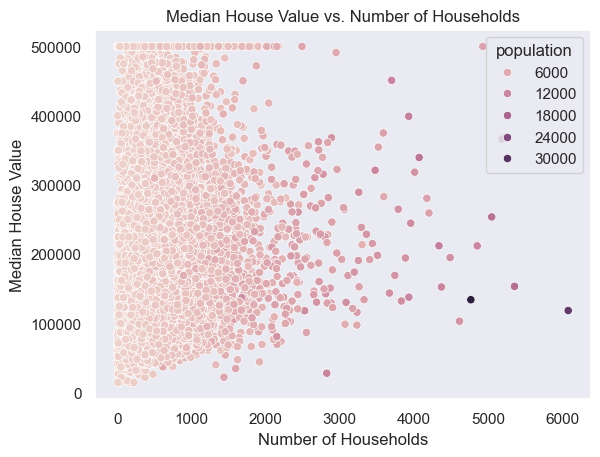

In [58]:

# Scatter plot of median house value vs. number of households with a custom color
sns.scatterplot(x='households', y='median_house_value',hue='population', data=housing, color='green')  
plt.title('Median House Value vs. Number of Households')
plt.xlabel('Number of Households')
plt.ylabel('Median House Value')
plt.show()


In [66]:
# Plot for median house value vs. number of households
# sns.scatterplot(x='households', y='median_house_value', data=housing)
# plt.title('Median House Value vs. Number of Households')
# plt.show()


# sns.scatterplot(x='population', y='median_house_value', data=housing)
# plt.title('Median House Value vs. Population')
# plt.show()

# sns.scatterplot(x='median_income', y='median_house_value', data=housing)
# plt.title('Median House Value vs. Median Income')
# plt.show()



In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Defining the function for regression
def run_regression(X, y):
    model = LinearRegression()
    model.fit(X, y)
    predictions = model.predict(X)
    intercept = model.intercept_
    slope = model.coef_[0]
    mse = mean_squared_error(y, predictions)
    mae = mean_absolute_error(y, predictions)
    return intercept, slope, mse, mae, predictions

# Model 1: Median Income
X_income = housing[['median_income']]
y = housing['median_house_value']
intercept_income, slope_income, mse_income, mae_income, predictions_income = run_regression(X_income, y)

# Model 2: Population
X_population = housing[['population']]
intercept_pop, slope_pop, mse_pop, mae_pop, predictions_pop = run_regression(X_population, y)

# Model 3: Households
X_households = housing[['households']]
intercept_house, slope_house, mse_house, mae_house, predictions_house = run_regression(X_households, y)


In [65]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming housing_data has already been loaded
# Independent Variables
X_income = housing[['median_income']]
X_population = housing[['population']]
X_households = housing[['households']]

# Dependent Variable
y = housing['median_house_value']

# Function to run the linear regression and return intercept, slope, MSE, and MAE
def run_regression(X, y):
    model = LinearRegression()
    model.fit(X, y)
    predictions = model.predict(X)
    
    intercept = model.intercept_
    slope = model.coef_[0]
    mse = mean_squared_error(y, predictions)
    mae = mean_absolute_error(y, predictions)
    
    return intercept, slope, mse, mae

# Run regression for each independent variable
intercept_income, slope_income, mse_income, mae_income = run_regression(X_income, y)
intercept_population, slope_population, mse_population, mae_population = run_regression(X_population, y)
intercept_households, slope_households, mse_households, mae_households = run_regression(X_households, y)

# Create a DataFrame for summary
summary_data = {
    'Model': ['Median Income', 'Population', 'Households'],
    'Intercept': [intercept_income, intercept_population, intercept_households],
    'Slope': [slope_income, slope_population, slope_households],
    'MSE': [mse_income, mse_population, mse_households],
    'MAE': [mae_income, mae_population, mae_households]
}

summary_df = pd.DataFrame(summary_data)

# Display the summary table
#print(summary_df)
display(summary_df)


,Model,Intercept,Slope,MSE,MAE
0,Median Income,45085.576703,41793.849202,7.011312e+09,62625.933791
1,Population,210436.262076,-2.511753,1.330741e+10,91153.820095
2,Households,196928.577162,19.872775,1.325778e+10,90802.743243


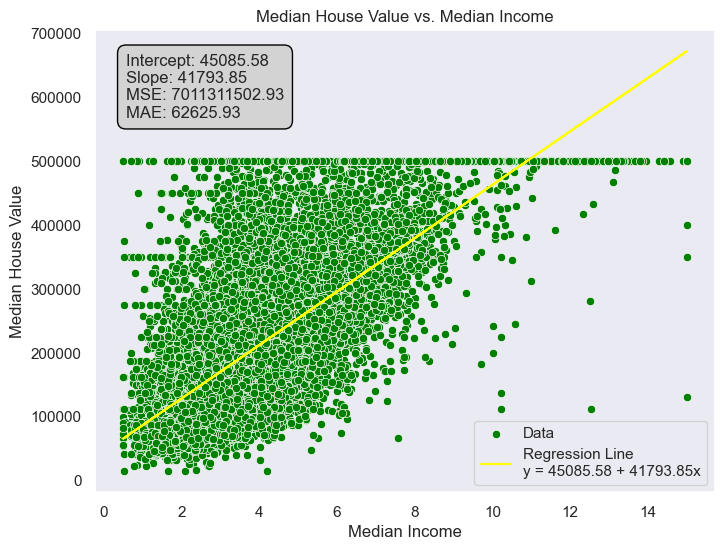

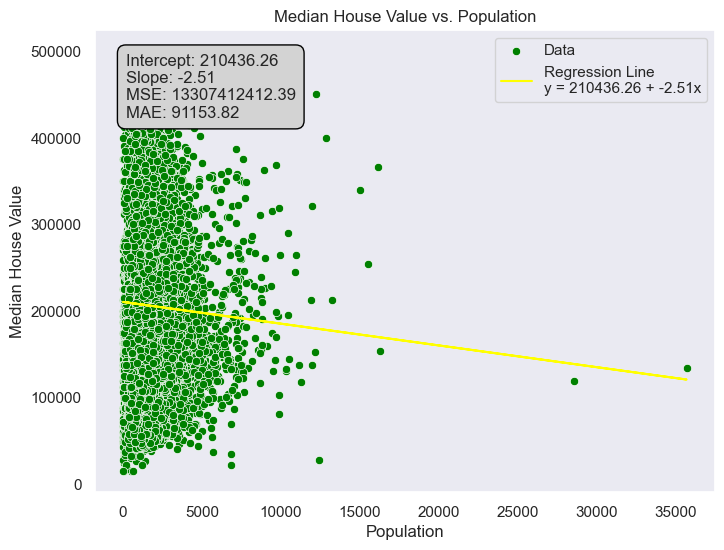

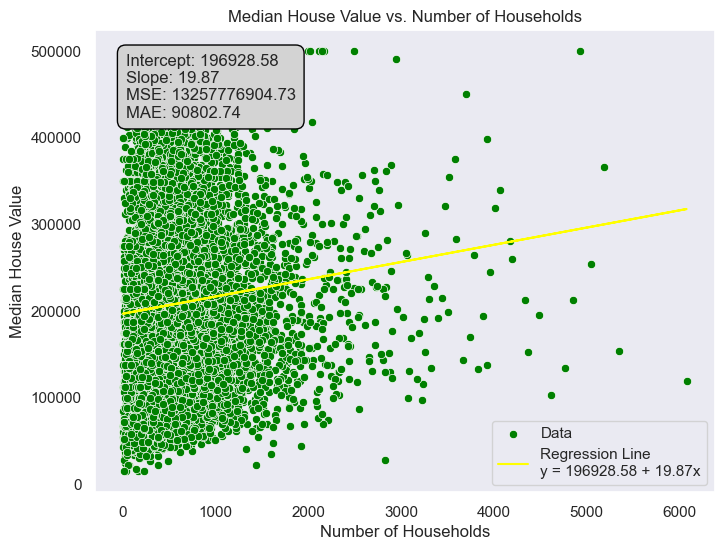

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Function to plot scatter and regression line
def plot_regression(X, y, predictions, intercept, slope, mse, mae, xlabel, title):
    plt.figure(figsize=(8, 6))
    
    # Plot scatter plot
    sns.scatterplot(x=X.squeeze(), y=y, color='green', label='Data')
    
    # Plot regression line
    plt.plot(X, predictions, color='yellow', label=f'Regression Line\ny = {intercept:.2f} + {slope:.2f}x')
    
    # Add text box with model details
    textstr = f'Intercept: {intercept:.2f}\nSlope: {slope:.2f}\nMSE: {mse:.2f}\nMAE: {mae:.2f}'
    plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
             verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='lightgray'))
    
    plt.xlabel(xlabel)
    plt.ylabel('Median House Value')
    plt.title(title)
    plt.legend()
    plt.show()

# Function to run regression and plot
def run_regression_and_plot(X, y, xlabel, title):
    model = LinearRegression()
    model.fit(X, y)
    predictions = model.predict(X)
    
    intercept = model.intercept_
    slope = model.coef_[0]
    mse = mean_squared_error(y, predictions)
    mae = mean_absolute_error(y, predictions)
    
    plot_regression(X, y, predictions, intercept, slope, mse, mae, xlabel, title)

# Median House Value vs. Median Income
X_income = housing[['median_income']]
y = housing['median_house_value']
run_regression_and_plot(X_income, y, 'Median Income', 'Median House Value vs. Median Income')

# Median House Value vs. Population
X_population = housing[['population']]
run_regression_and_plot(X_population, y, 'Population', 'Median House Value vs. Population')

# Median House Value vs. Number of Households
X_households = housing[['households']]
run_regression_and_plot(X_households, y, 'Number of Households', 'Median House Value vs. Number of Households')
